In [1]:
import os   #used for directory work
import matplotlib.patches as mpatches #used for plot legends
import matplotlib.pyplot as plt #used for creating plots
import matplotlib.cm as cm
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
burn_d = {'01': [21000 ,22289], '02': [14000, 14972], '03': [20000, 20296], '04': [30000, 34979], '05': [15000, 15974], \
          '06': [6000, 6544], '07': [25000, 27822], '08': [18000, 19810], '09': [20000, 25047], '11': [30000,30681],  \
          '12': [60000, 62937], '13': [50000, 55131], '18': [185000, 192322], '19': [45000, 48831], '20': [24000, 25860],\
          '21': [25000, 27822], '22': [27000, 29484], '23': [45000, 48846], '24': [20000, 23015], '25': [25000, 26797], \
          '26': [25000, 26909], '27': [35000, 36916], '28': [27000, 28673], '29': [25000, 28166], '30': [12000, 13954], \
          '31': [30000, 31046], '32': [25000, 26294], '33': [20000, 23293], '34': [40000,43702]}

In [13]:
path_02="/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-07/sonics/" #79 location
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-07/thermal_couples/"

#path= "/home/JoeySeitz/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Full-Timestamp/Burn-07/thermal_couples/"  #134 location
#path_02 = "/home/JoeySeitz/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Full-Timestamp/Burn-07/sonics/"

#path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-07/thermal_couples/"
#path_02 = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-07/sonics/"

In [14]:
def text_finder(path):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    
    return txt_files

def file_to_df(path):
    df= pd.read_csv(path,na_values = ['NAN', "00nan","000nan","NaN"], sep=" ")
    
    return df

In [ ]:
df_tc=file_to_df(path+tc_files[1])
df.columns = ['TIMESTAMP', 'TC 0cm', 'TC 5cm', 'TC 10cm', 'TC 20cm',\
              'TC 30cm', 'TC 50cm', 'TC 100cm'] 
df_s = file_to_df(path_02+sonic_files[1])

In [87]:
def plotting(burn, x_fire,y_lim= False):
    path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #79
    #path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-"
    cols= ['TIMESTAMP', 'TC 0cm', 'TC 5cm', 'TC 10cm', 'TC 20cm',\
                  'TC 30cm', 'TC 50cm', 'TC 100cm']

    tc_files = text_finder(path+burn+"/thermal_couples/")
    sonic_files = text_finder(path+burn+"/sonics/")[4:12]

    colors = ["navy","cyan", "springgreen",\
             "darkkhaki", "orange", "saddlebrown", "firebrick"]
    plot_cols = cols[1:]
    fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(18,8))

    x=0
    for col in range(2):
        for row in range(4):
            df_tc=file_to_df(path+burn+"/thermal_couples/"+tc_files[x])
            df_tc.columns = cols
            df_s = file_to_df(path+burn+"/sonics/"+sonic_files[x])

            ax = axs[ col, row]
            x_marker= (len(df_tc)-500)//4
            markers, m_loc = [], []
            for i in range(5):
                markers.append(df_tc["TIMESTAMP"][x_marker*i][-12:-2])
                m_loc.append(x_marker*i)

            x_lst= np.arange(len(df_tc))
            for i in range(len(plot_cols)):
                ax.scatter(x_lst,df_tc[plot_cols[i]], label = plot_cols[i], marker = "s", s = .1, c = colors[i], alpha = .5)
            ax.scatter(x_lst,df_s["T"], label ="Sonic (2.5m)", c = "black", marker = "o", s=.1, alpha = .5)
            ax.vlines(x_fire,-10,600,linestyle = "--",linewidth = .5, label = "Fire Start", color = "r")
            ax.set_xlim(0, len(df_tc))
            if y_lim == True:
                ax.set_ylim(0,150)
            if y_lim == False:
                ax.set_ylim(0,600)
            ax.set_xticks(m_loc)
            ax.set_xticklabels(markers, rotation = 20, fontsize = 8)
            ax.set_title(tc_files[x][:2], fontsize = 16,fontweight = "bold")
            if row == 0:
                ax.set_ylabel(r"Temperature ($^{\circ}C$)", fontsize = 14)
            if col == 1:
                ax.set_xlabel("Time", fontsize = 14)
            
            x=x+1 #used to change the files
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.35, wspace=0.2, top=.85)#, left = 0.05, right = .95, bottom = .07)
    fig.suptitle("Burn "+burn+"  "+df_tc["TIMESTAMP"][0][:10], fontsize = 20, x= .2, y= .95, fontweight = "bold")
    handles, labels = ax.get_legend_handles_labels()
    leg = fig.legend(handles[:9], labels[:9], ncol = 5, fontsize = 14, bbox_to_anchor=(.9, .99), framealpha = .8,markerscale = 8 )
    [lh.set_alpha(1) for lh in leg.legendHandles ]
    
    if y_lim == True:
        fig.savefig("TC-Sonic-Temperatures-150C-Burn-"+burn+"_Grid.png",dpi=350)
    if y_lim == False:
        fig.savefig("TC-Sonic-Temperatures-Burn-"+burn+"_Grid.png",dpi=350)
    plt.show()

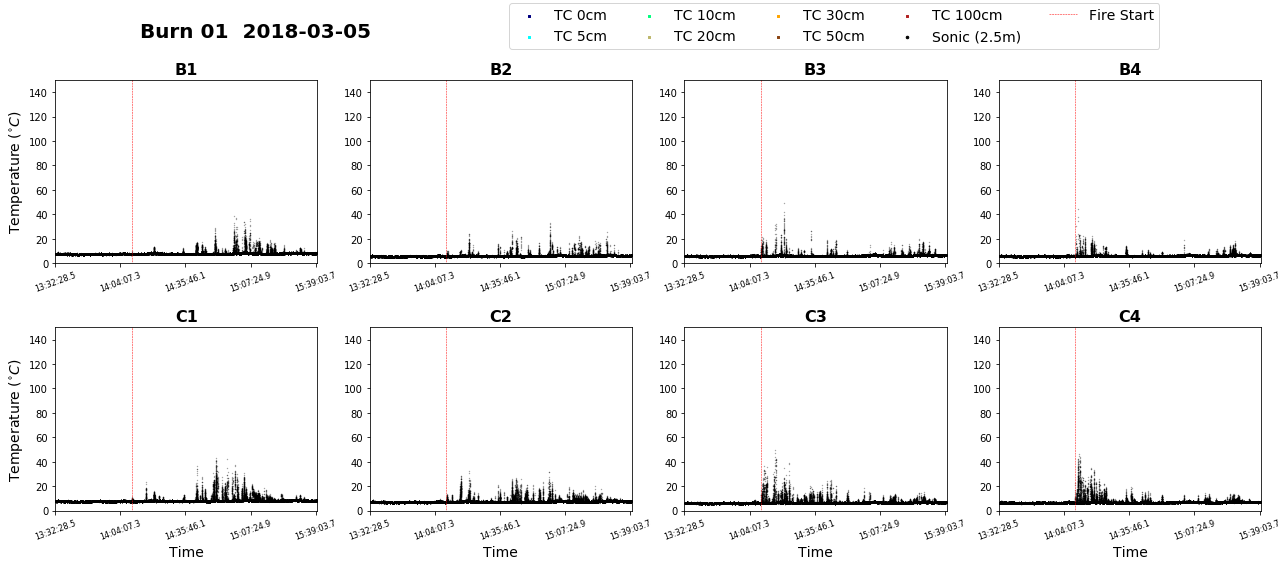

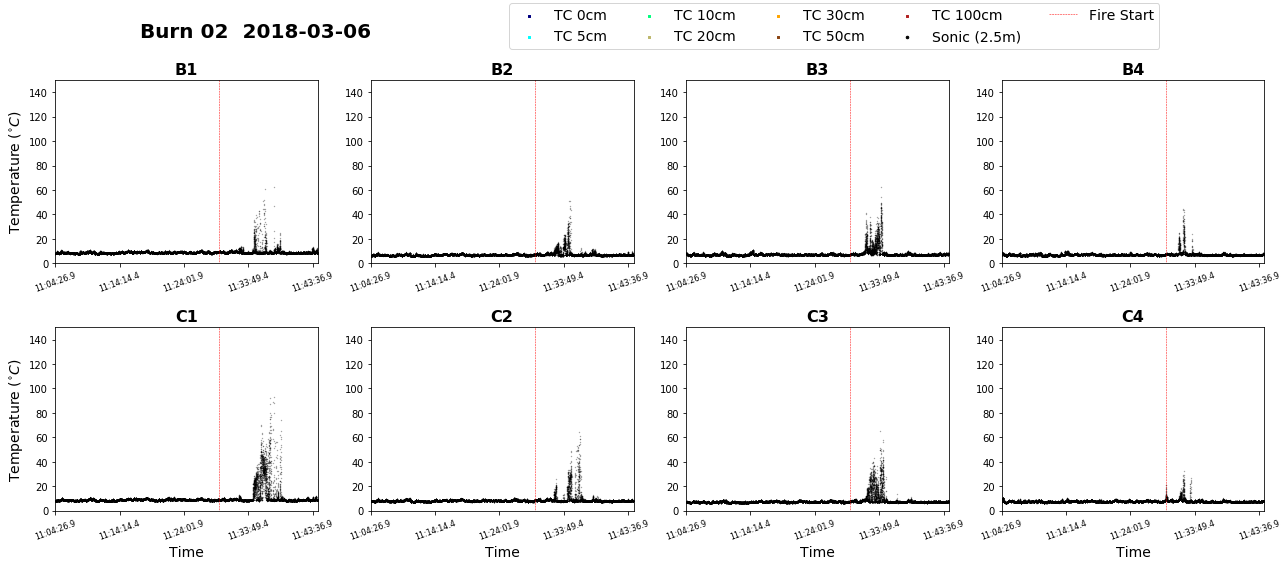

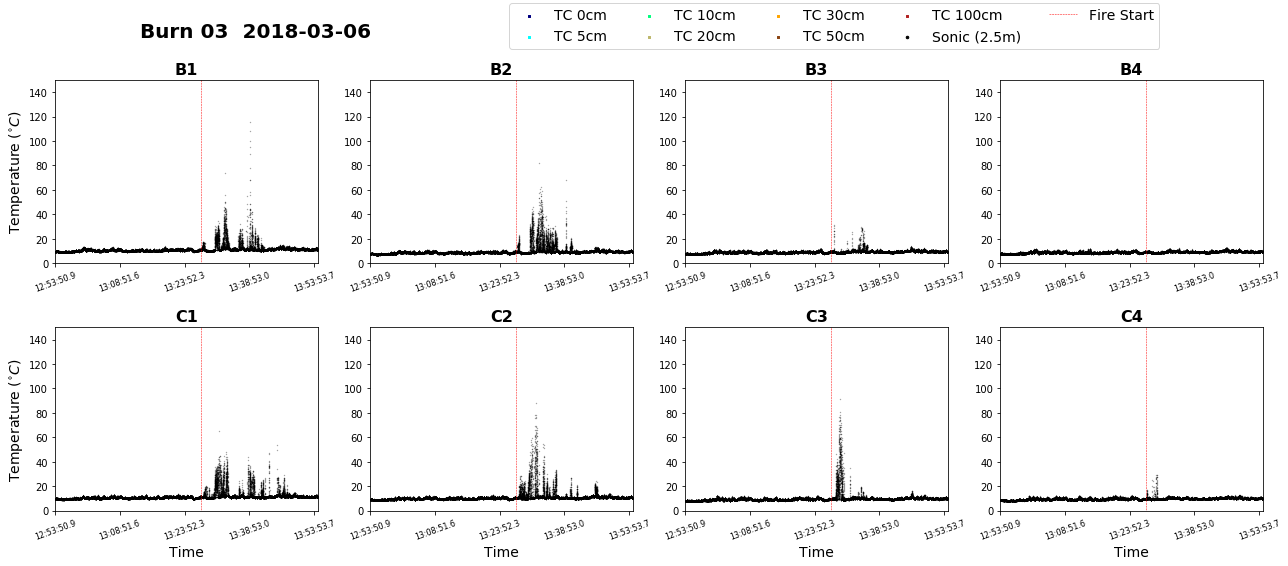

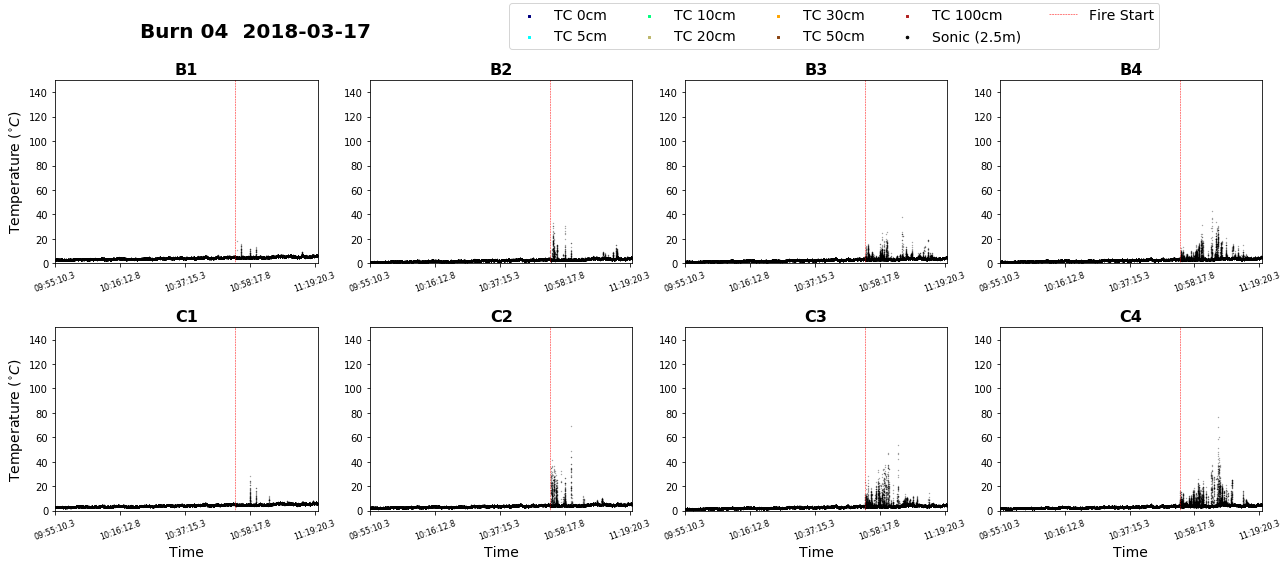

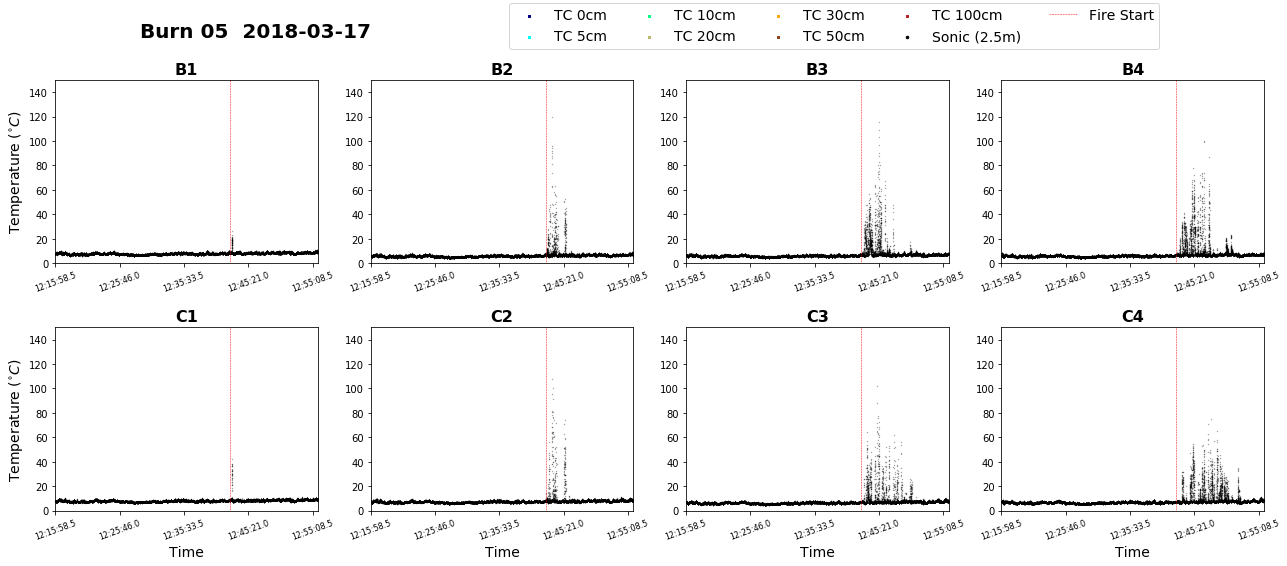

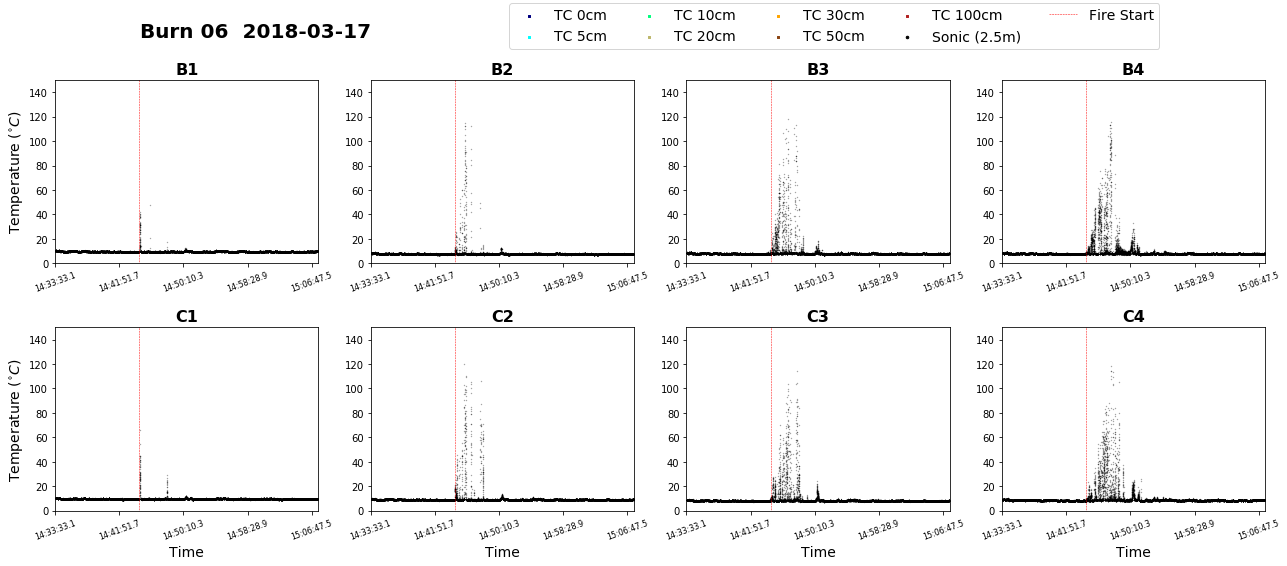

In [88]:
burns = ["01","02","03","04","05","06","07","08","09","11","12","13","18","19","20", \
         "21","22","23","24","25","26","27", "28","29","30","31","32","33","34"]
for brn in burns[:6]:
    plotting(brn, burn_d[brn][1], True)

In [83]:
def plotting_2(burn, x_fire, y_lim = False):
    path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #79
    #path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #W10
    cols= ['TIMESTAMP', 'TC 0cm', 'TC 5cm', 'TC 10cm', 'TC 20cm',\
                  'TC 30cm', 'TC 50cm', 'TC 100cm']

    tc_files = text_finder(path+burn+"/thermal_couples/")
    sonic_files = text_finder(path+burn+"/sonics/")[4:12]

    colors = ["navy","cyan", "springgreen",\
             "darkkhaki", "orange", "saddlebrown", "firebrick"]
    plot_cols = cols[1:]
    fig, axs = plt.subplots(nrows=2,ncols=7,figsize=(22,8))

    x, x_2, col_list = 0, 0, [0,2,4,6]
    for col in range(2):
        for row in range(7):
            df_tc=file_to_df(path+burn+"/thermal_couples/"+tc_files[x])
            df_tc.columns = cols
            if row%2 ==0:
                df_s = file_to_df(path+burn+"/sonics/"+sonic_files[x_2])
                
            ax = axs[ col, row]
            x_marker= (len(df_tc)-500)//4
            markers, m_loc = [], []
            for i in range(5):
                markers.append(df_tc["TIMESTAMP"][x_marker*i][-12:-2])
                m_loc.append(x_marker*i)

            x_lst= np.arange(len(df_tc))
            for i in range(len(plot_cols)):
                ax.scatter(x_lst,df_tc[plot_cols[i]], label = plot_cols[i], marker = "s", s = .1, c = colors[i], alpha = .5)
            if row%2 == 0:
                ax.scatter(x_lst,df_s["T"], label ="Sonic (2.5m)", c = "black", marker = "o", s=.1, alpha = .5)
            ax.vlines(x_fire,0,600,linestyle = "--",linewidth = .5, label = "Fire Start", color = "r")
            ax.set_xlim(0, len(df_tc))
            if y_lim == True:
                ax.set_ylim(0,150)
            if y_lim == False:
                ax.set_ylim(0,600)
            ax.set_xticks(m_loc)
            ax.set_xticklabels(markers, rotation = 20, fontsize = 8)
            if row%2 == 0:
                sub_title = str("SC "+sonic_files[x_2][:2]+ "   TC " + tc_files[x][:2] )
                ax.set_title(sub_title, fontsize = 16,fontweight = "medium")
                x_2 += 1
            if row%2 != 0:
                ax.set_title("TC "+tc_files[x][:2], fontsize = 16,fontweight = "medium")
                
            if row == 0:
                ax.set_ylabel(r"Temperature ($^{\circ}C$)", fontsize = 14)
            if col == 1:
                ax.set_xlabel("Time", fontsize = 14)
            
            x=x+1 #used to change the files
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.35, wspace=0.2, top=.85)#, left = 0.05, right = .95, bottom = .07)
    fig.suptitle("Burn "+burn+"  "+df_tc["TIMESTAMP"][0][:10], fontsize = 22, x= .3, y= .95, fontweight = "bold")
    handles, labels = ax.get_legend_handles_labels()
    leg = fig.legend(handles[:9], labels[:9], ncol = 5, fontsize = 14, bbox_to_anchor=(.9, .99), framealpha = .8,markerscale = 8 )
    [lh.set_alpha(1) for lh in leg.legendHandles ]
    if y_lim == True:
        fig.savefig("TC-Sonic-Temperatures-150C-Burn-"+burn+"_Grid.png",dpi=350)
    if y_lim == False:
        fig.savefig("TC-Sonic-Temperatures-Burn-"+burn+"_Grid.png",dpi=350)
    plt.show()

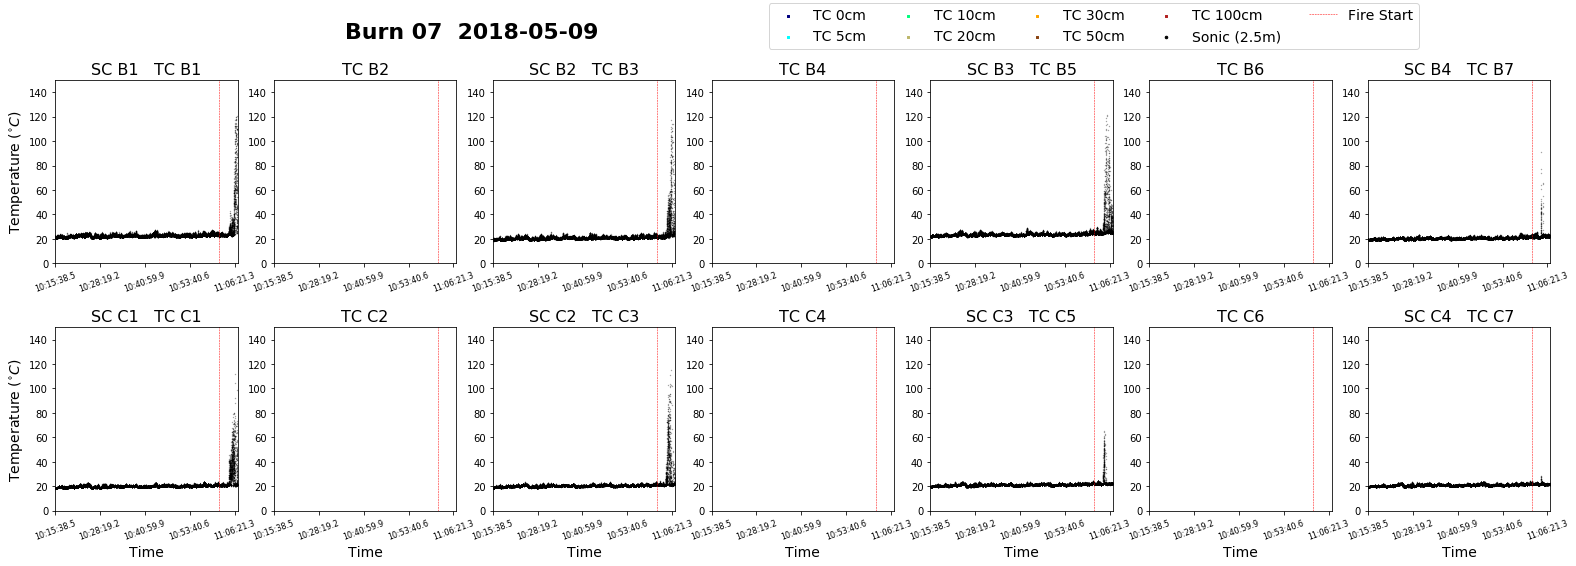

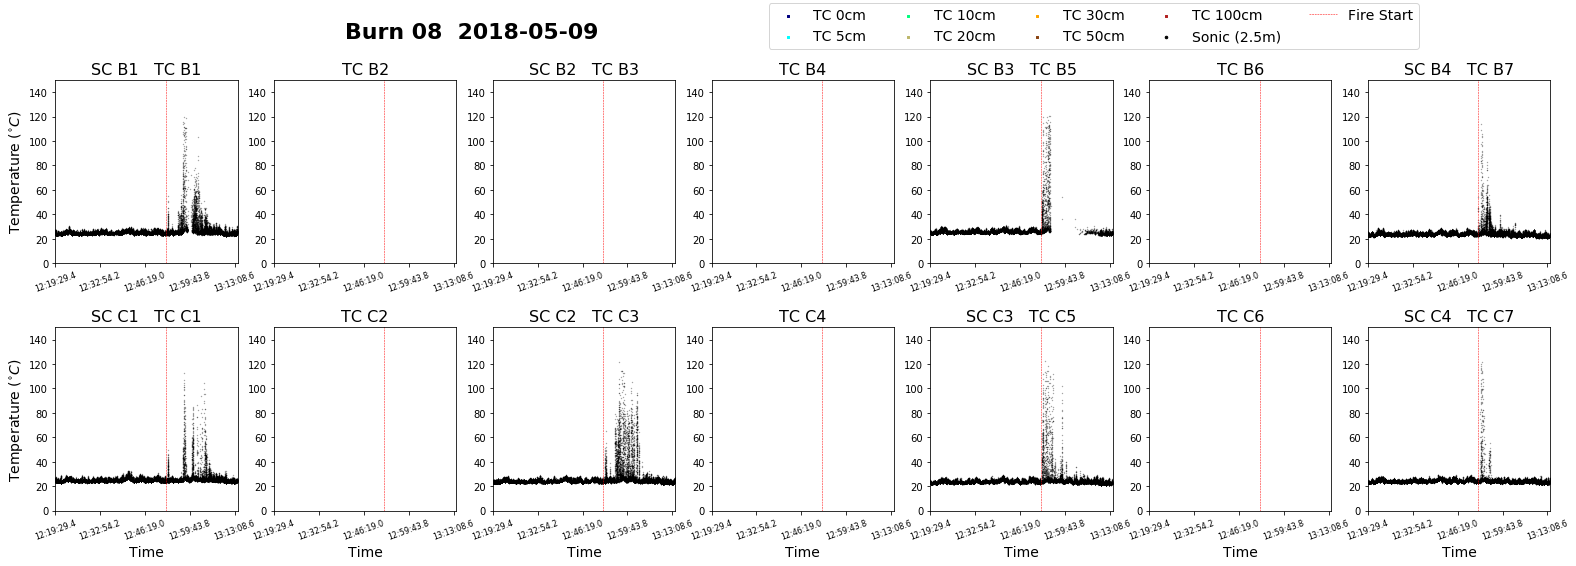

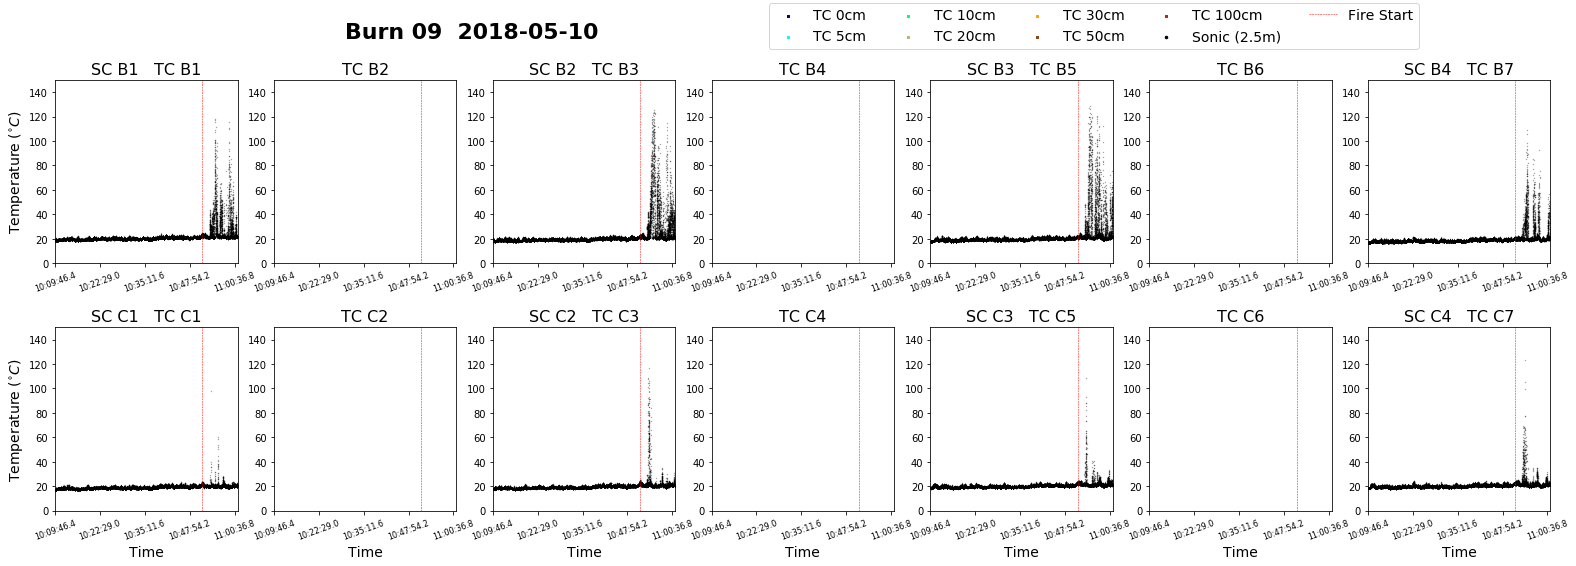

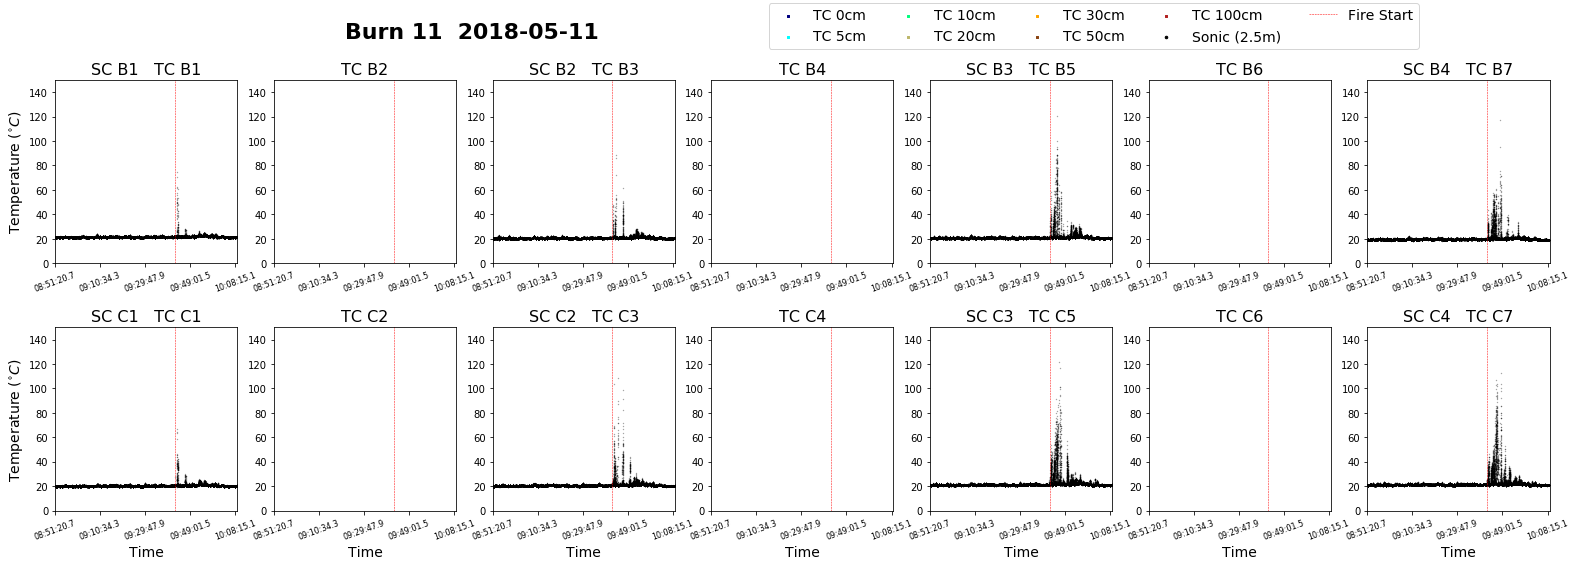

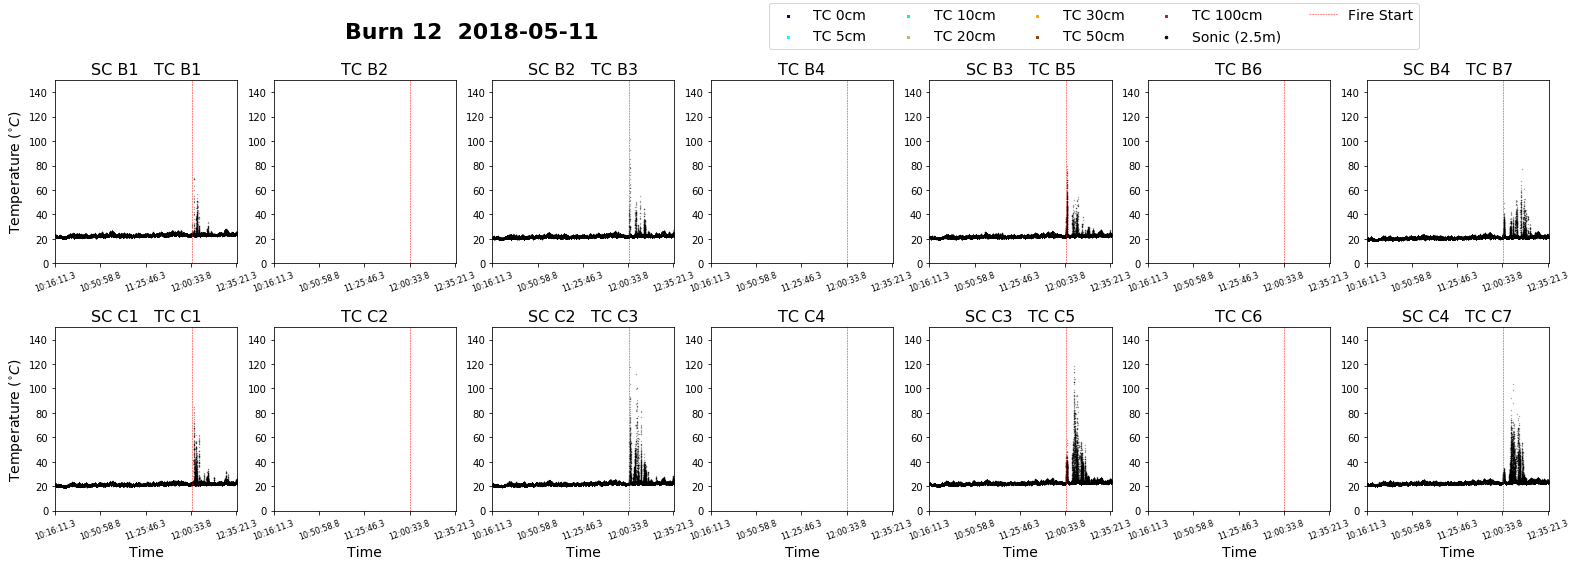

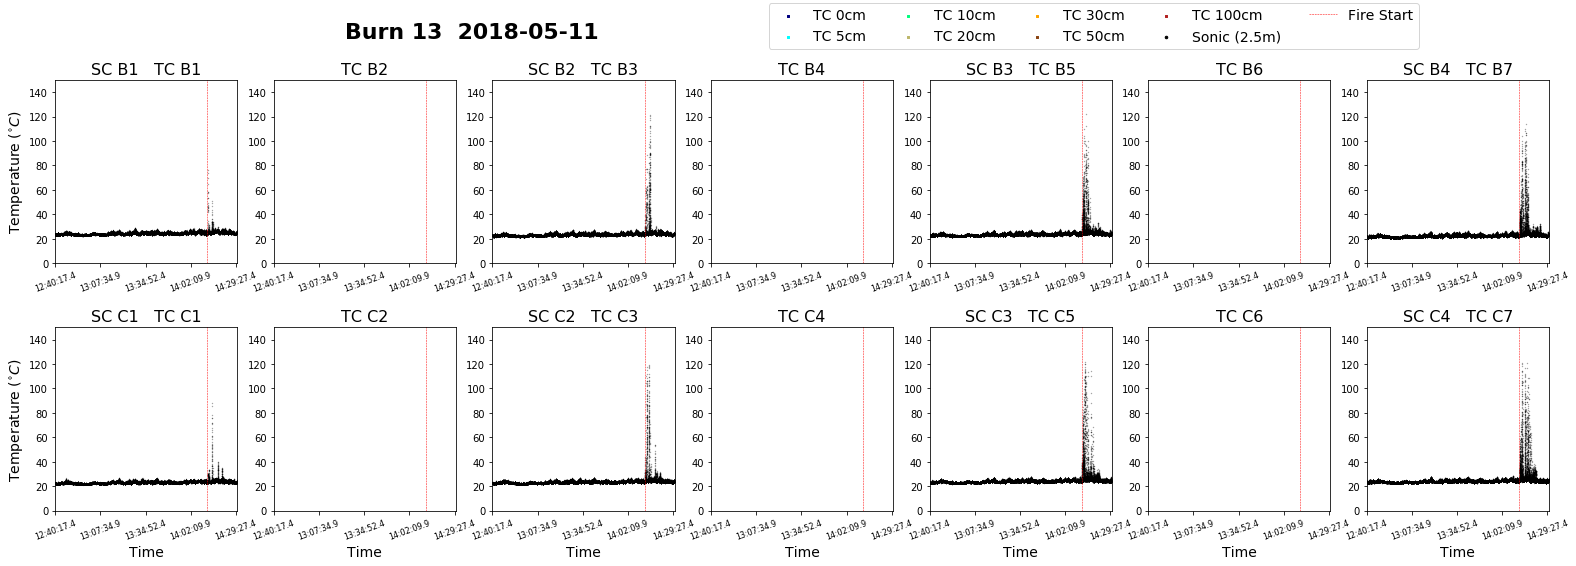

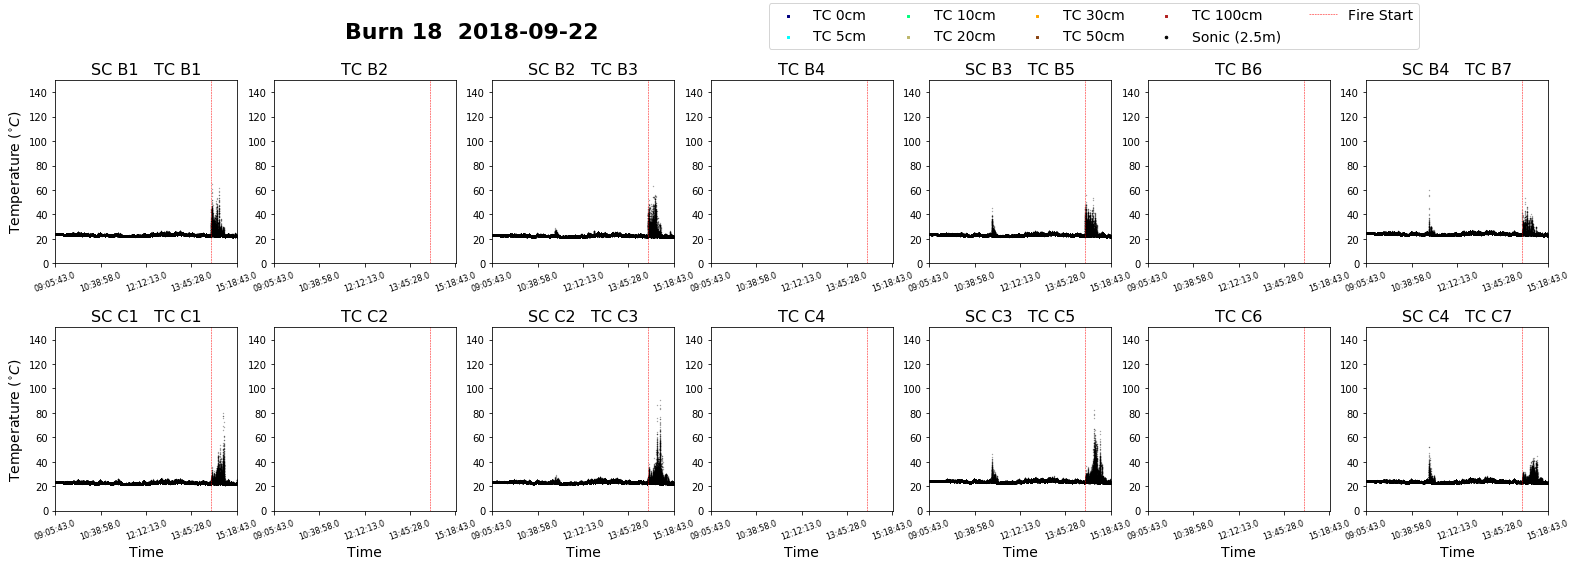

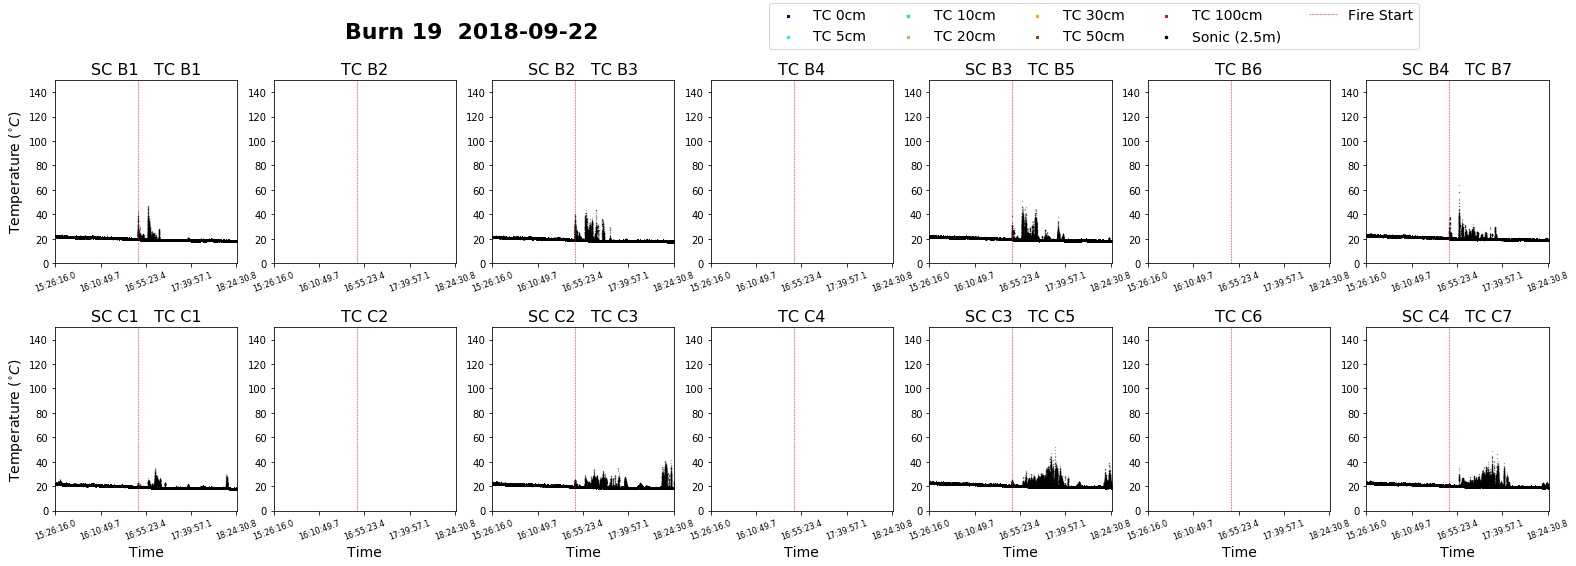

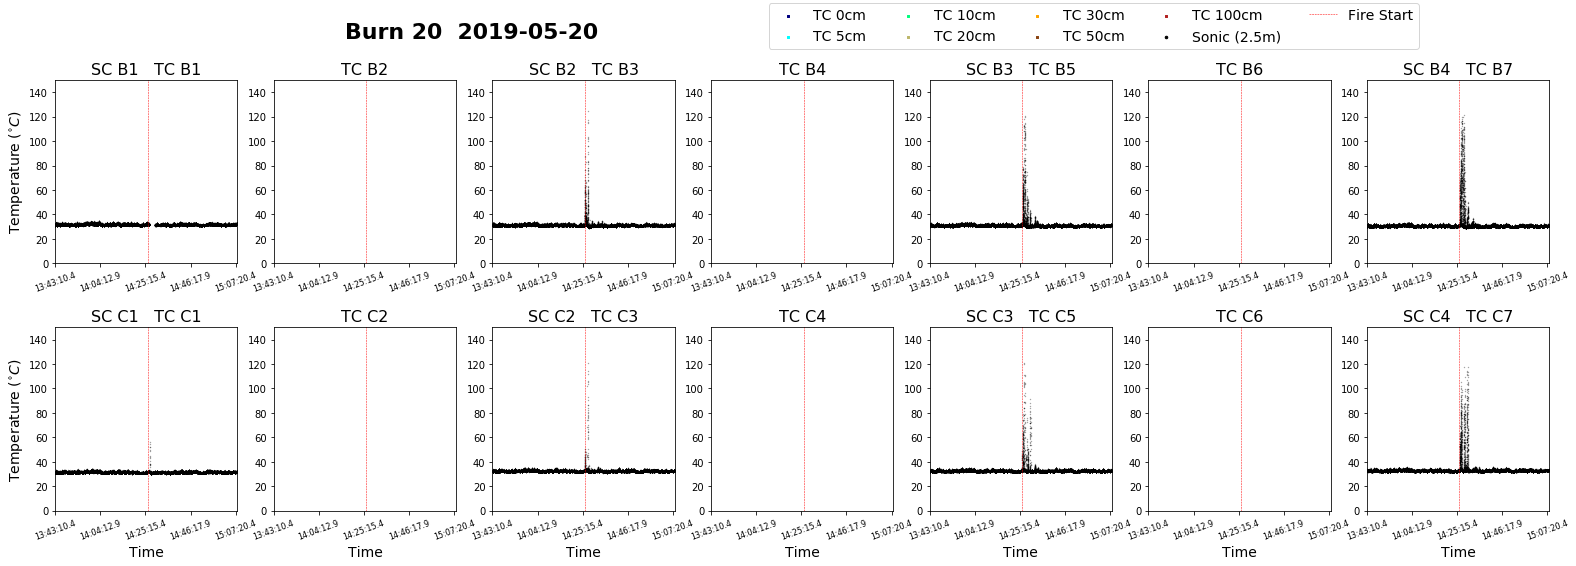

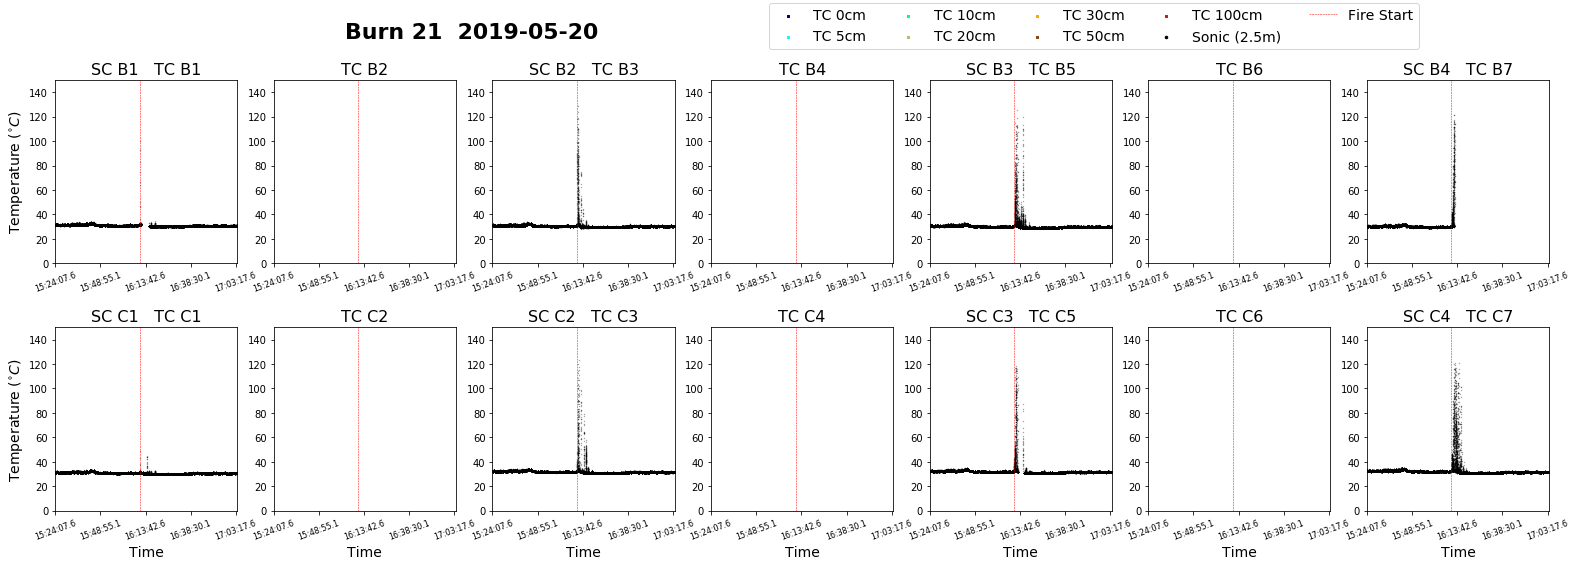

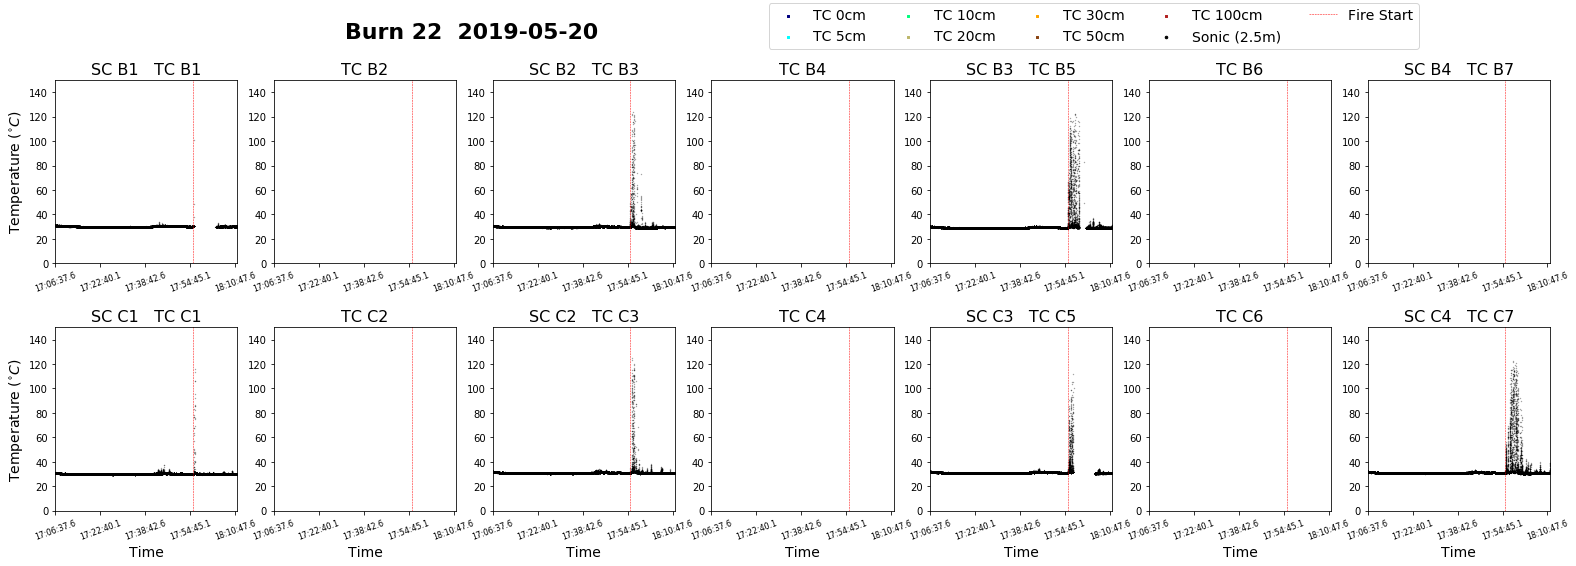

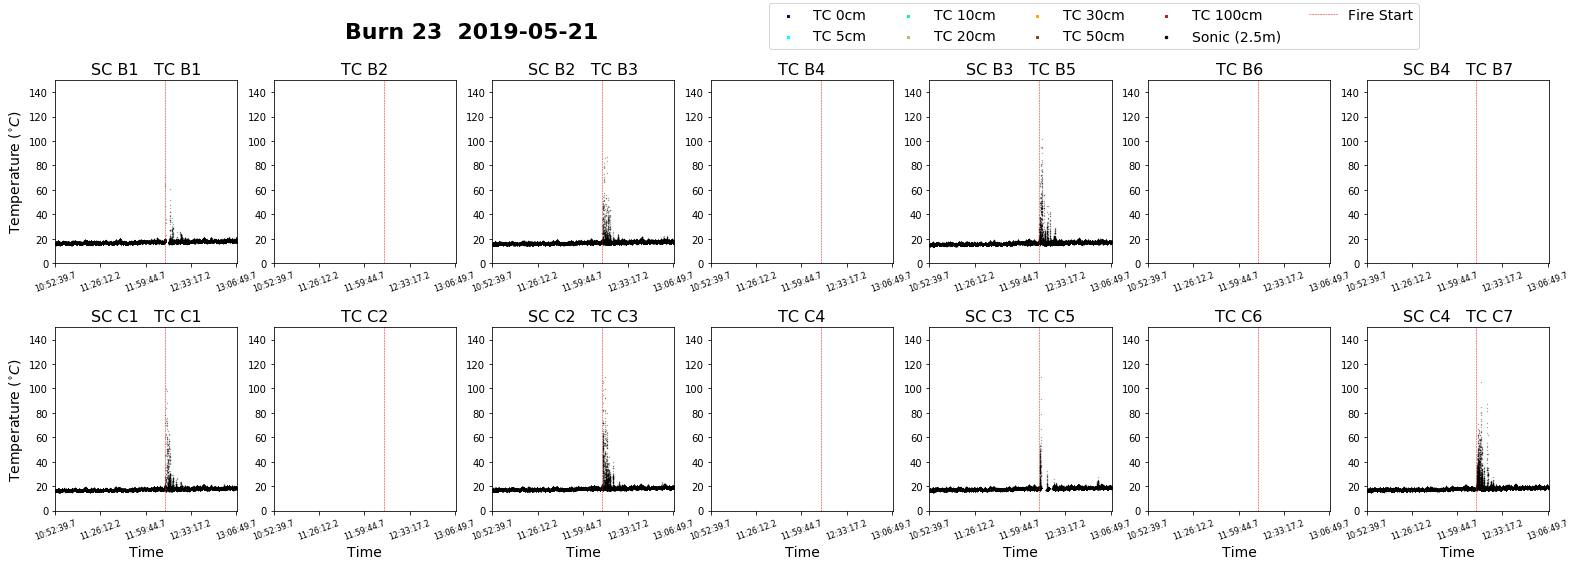

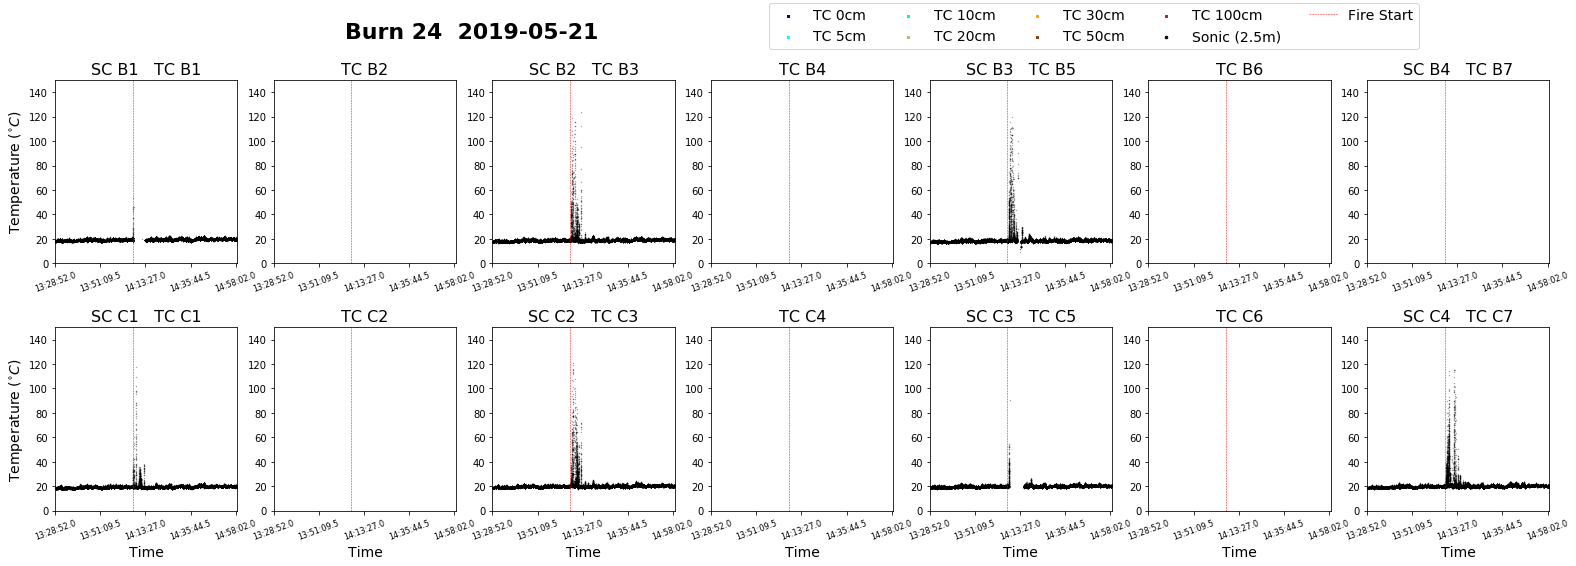

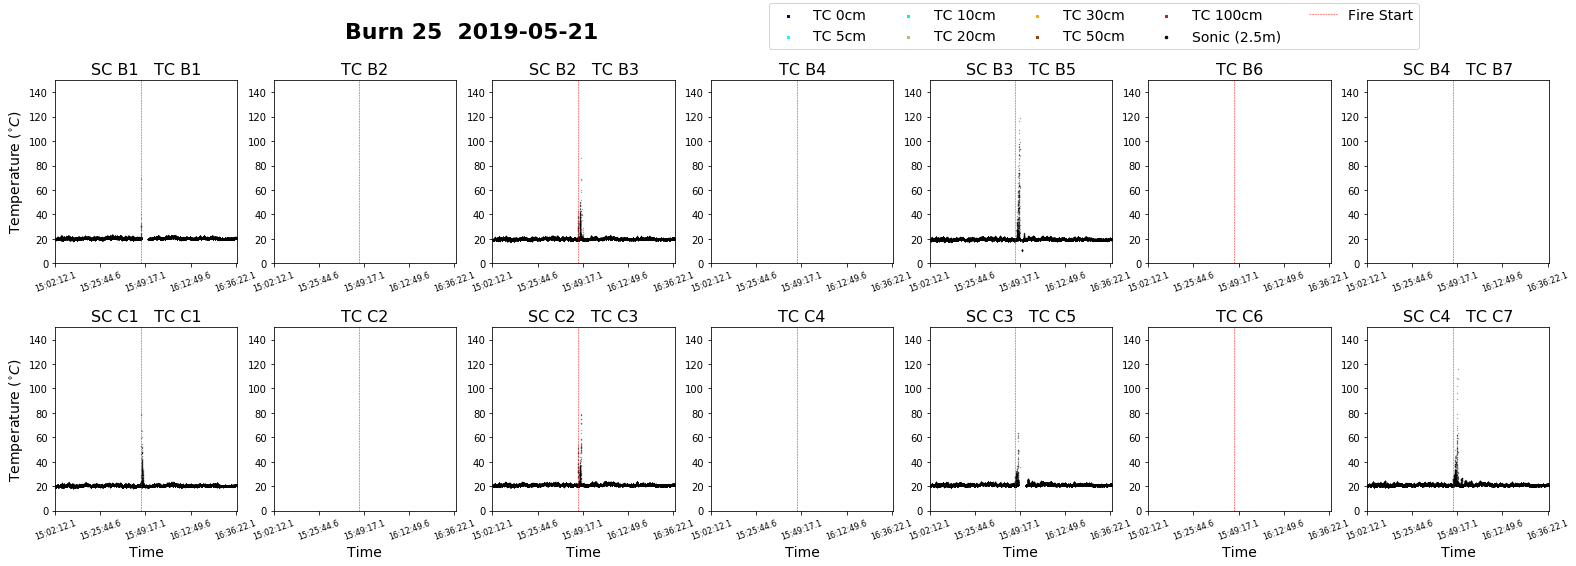

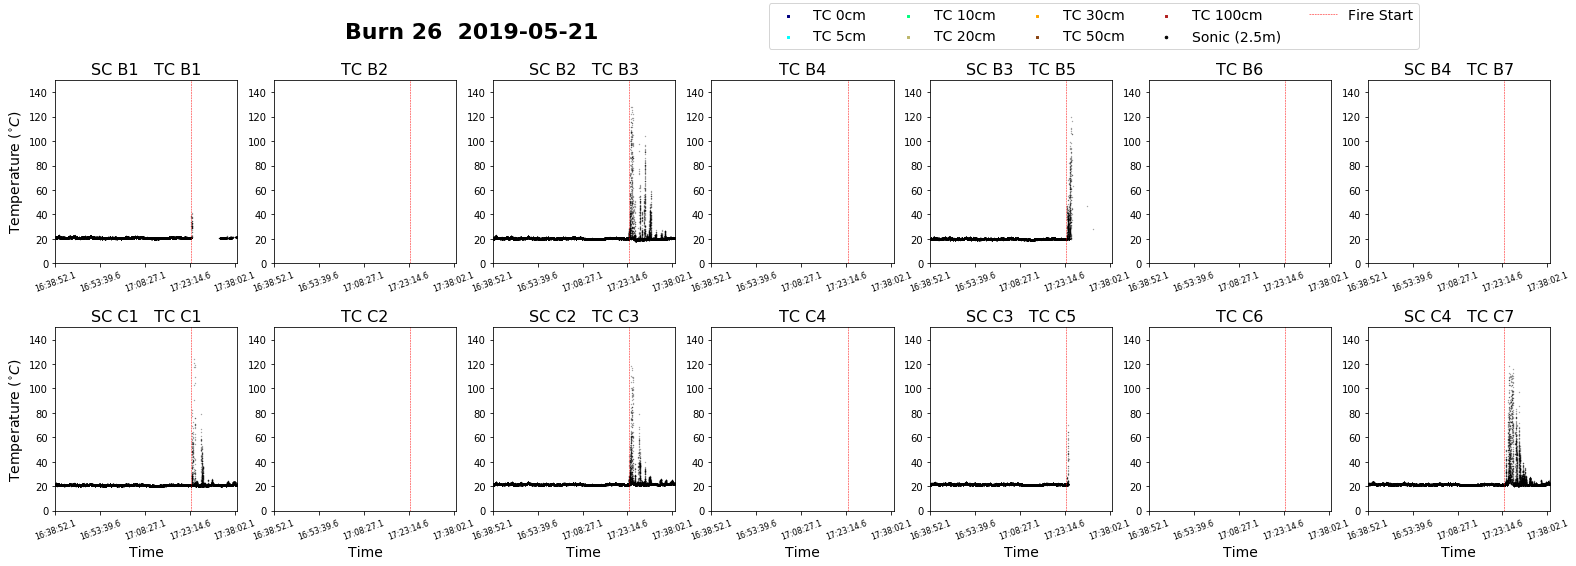

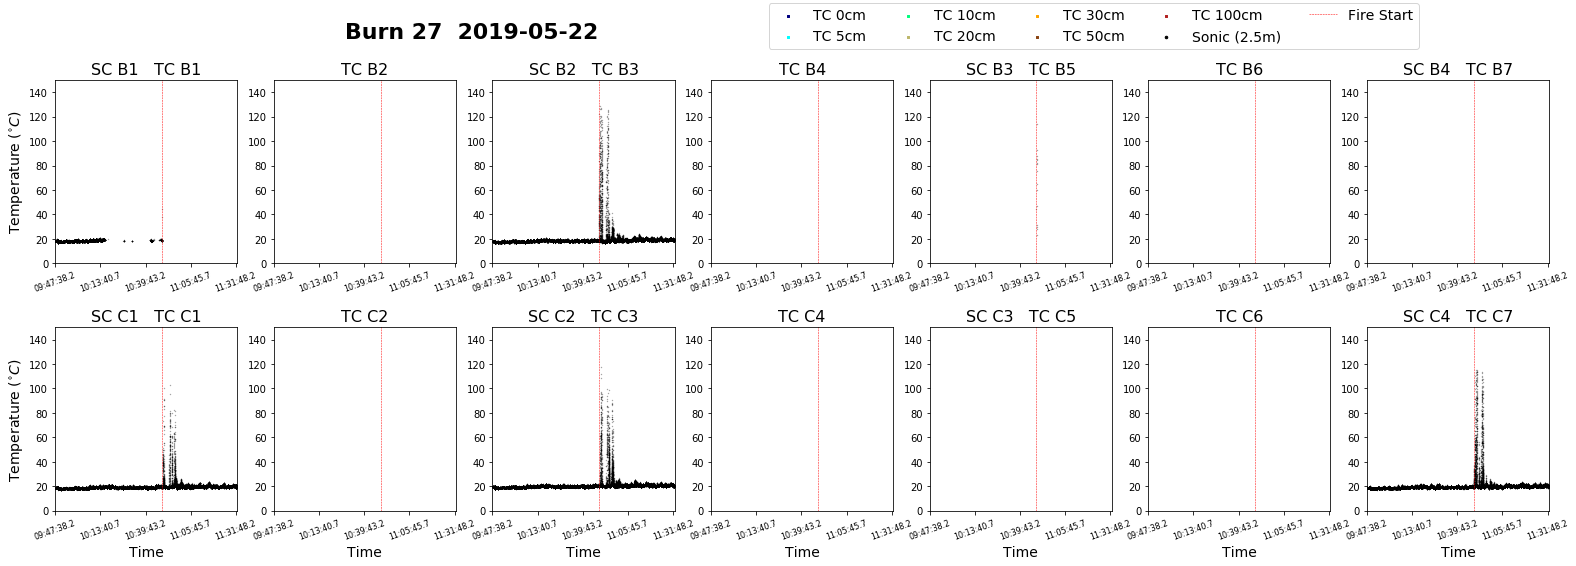

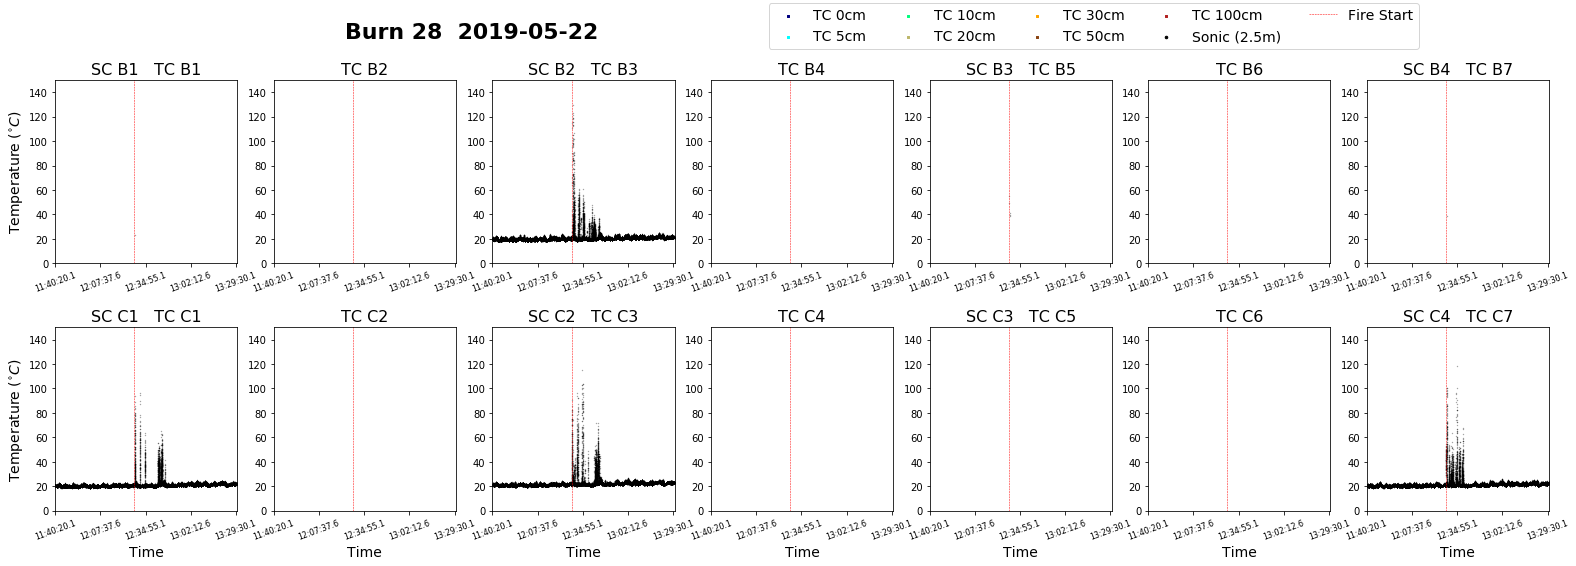

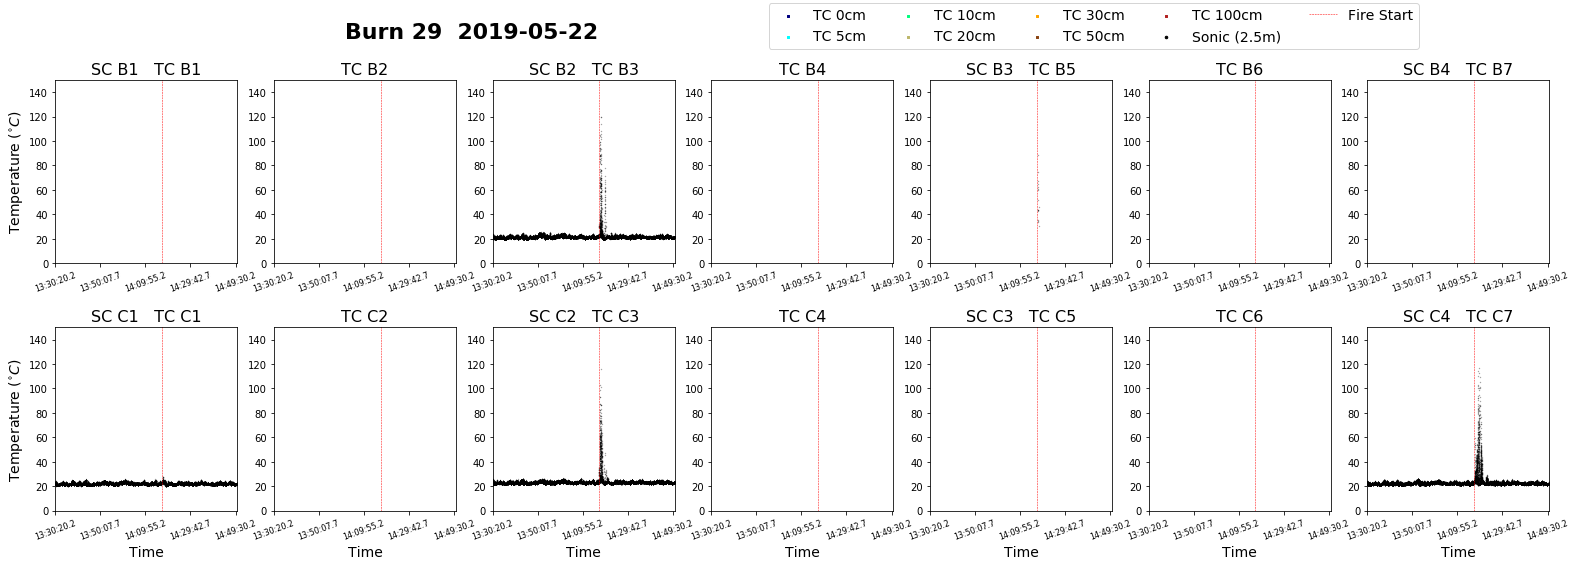

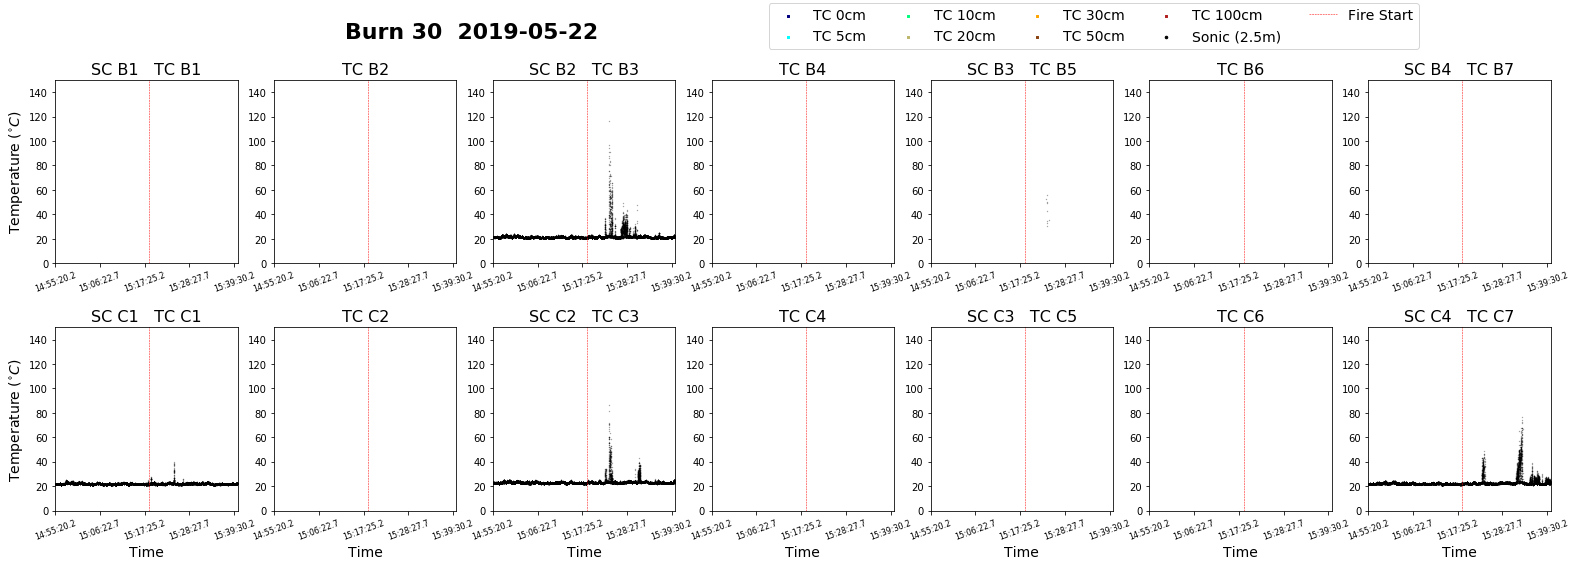

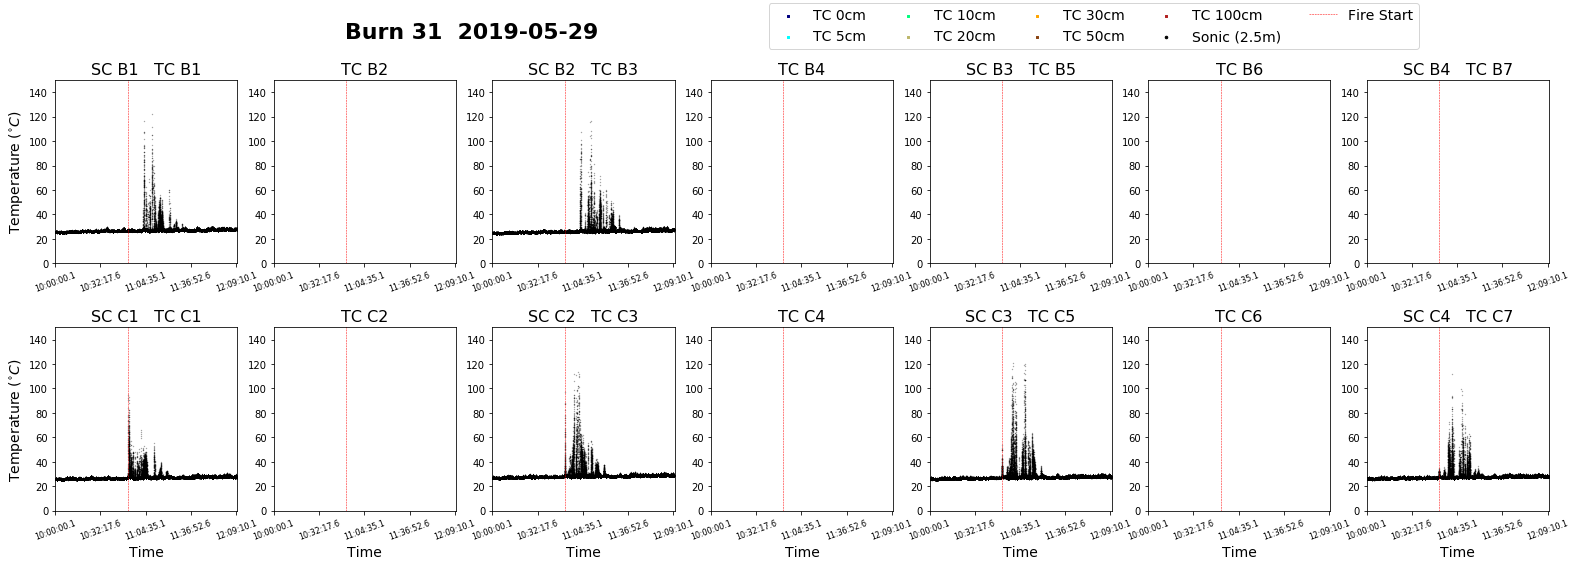

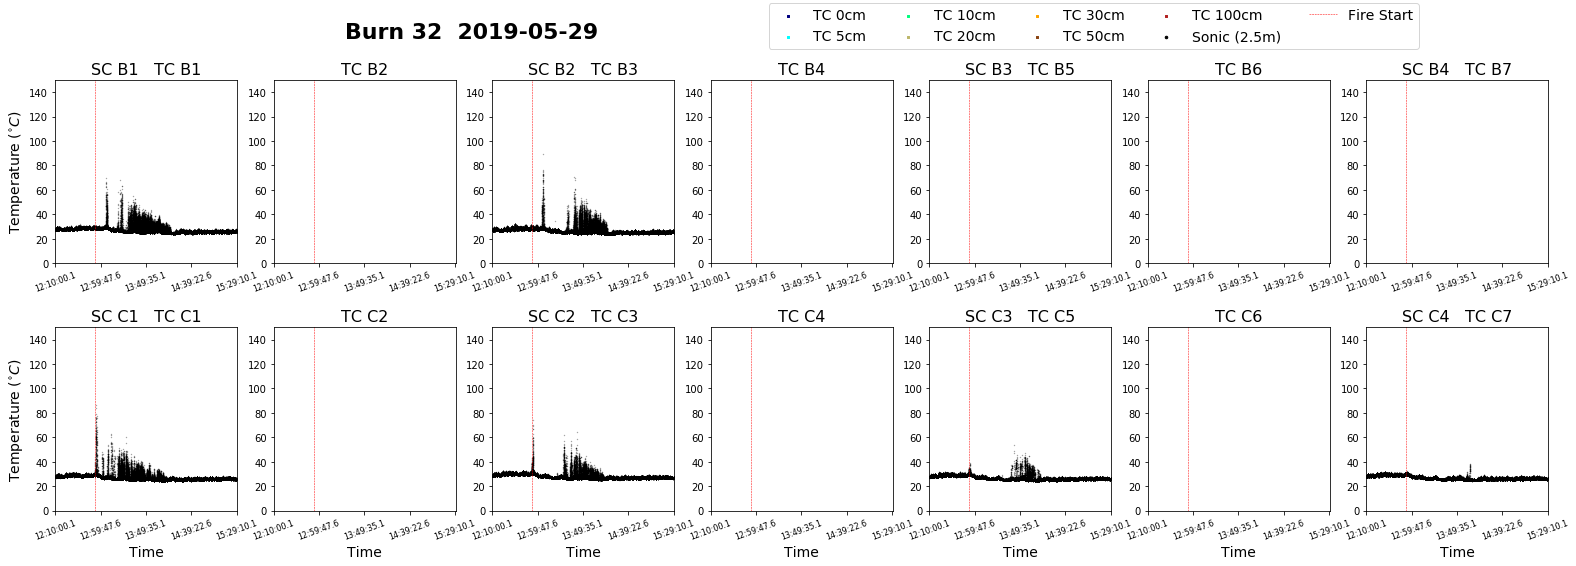

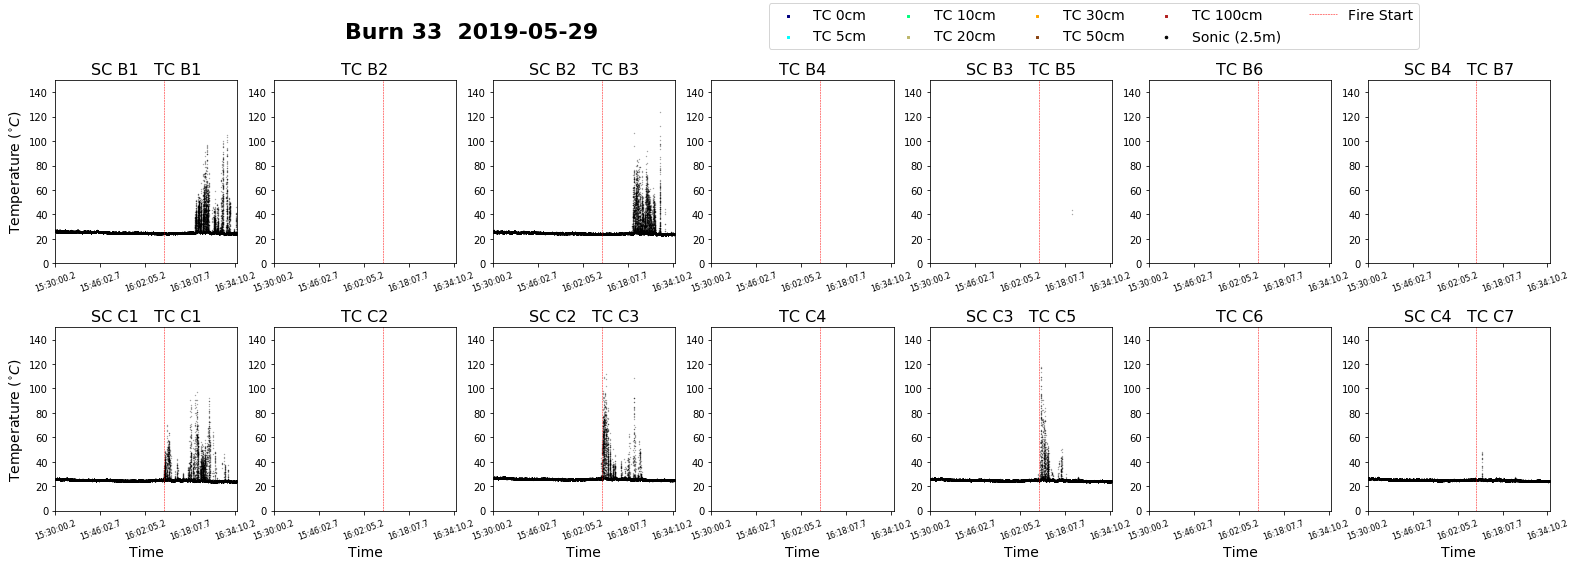

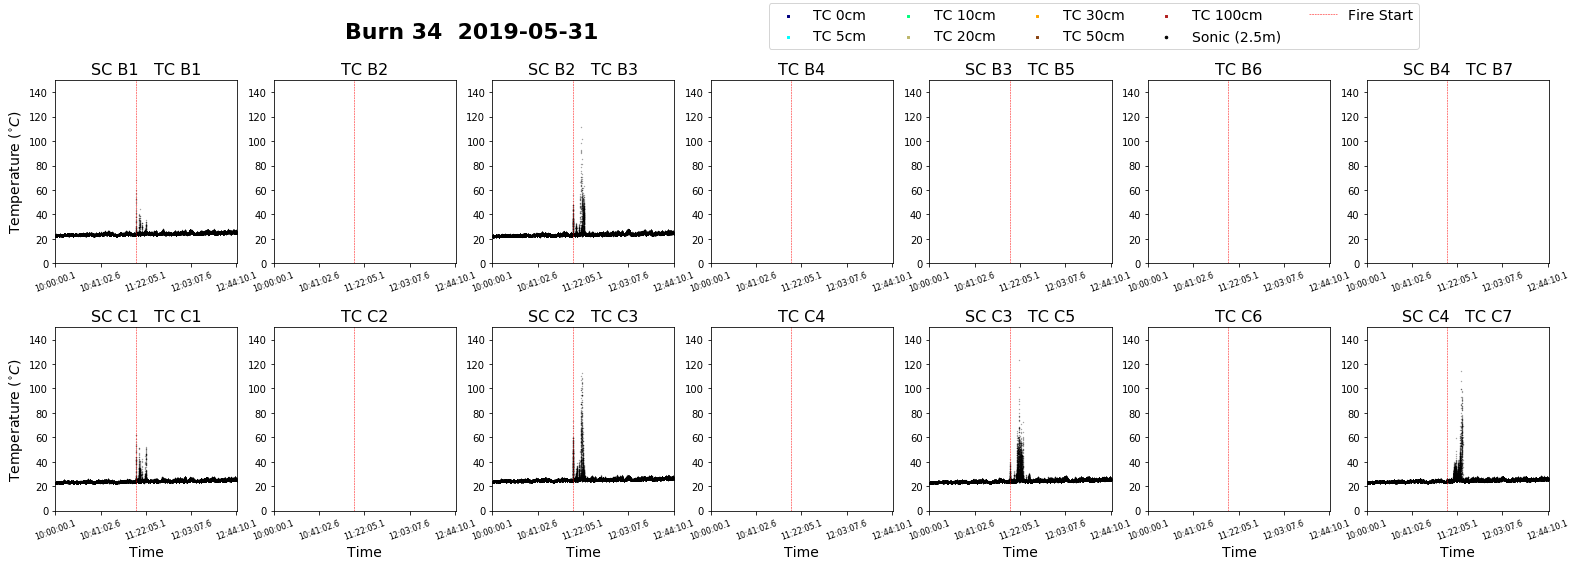

In [84]:
burns = ["01","02","03","04","05","06","07","08","09","11","12","13","18","19","20", \
         "21","22","23","24","25","26","27", "28","29","30","31","32","33","34"]
for brn in burns[6:]:
    plotting_2(brn, burn_d[brn][1], True)

In [ ]:
def speed(df):
    speed = list(np.full(len(df),np.nan))
    for i in range(len(df)):
        speed[i] = np.sqrt((df["V"][i]**2) +(df["U"][i]**2))
    return speed
    

In [164]:
def speed_fun(df):
    speed = list(np.full(len(df),np.nan))
    for i in range(len(df)):
        speed[i] = np.sqrt((df["V"][i]**2) +(df["U"][i]**2))
    return speed

def plotting_S_W(burn, x_fire,y_lim= False):
    path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #79
    #path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-"
    cols= ['TIMESTAMP', 'TC 0cm', 'TC 5cm', 'TC 10cm', 'TC 20cm',\
                  'TC 30cm', 'TC 50cm', 'TC 100cm']

    tc_files = text_finder(path+burn+"/thermal_couples/")
    sonic_files = text_finder(path+burn+"/sonics/")[4:12]

    colors = ["navy","cyan", "springgreen",\
             "darkkhaki", "orange", "saddlebrown", "firebrick"]
    plot_cols = cols[1:]
    fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(18,8))

    x=0
    for col in range(2):
        for row in range(4):
            df_tc=file_to_df(path+burn+"/thermal_couples/"+tc_files[x])
            df_tc.columns = cols
            df_s = file_to_df(path+burn+"/sonics/"+sonic_files[x])
            speed = speed_fun(df_s)
            ax = axs[ col, row]
            ax.grid()
            #x_marker= (len(df_tc)-500)//4
            #markers, m_loc = [], []
            #for i in range(5):
            #    markers.append(df_tc["TIMESTAMP"][x_marker*i][-12:-2])
            #    m_loc.append(x_marker*i)

            x_lst= np.arange(len(df_tc))
            for i in range(len(plot_cols)):
                ax.scatter(x_lst,df_tc[plot_cols[i]], label = plot_cols[i], marker = "s", s = .1, c = colors[i], alpha = .5)
            ax.scatter(x_lst,df_s["T"], label ="Sonic (2.5m)", c = "black", marker = "o", s=.1, alpha = .5)
            ax.vlines(x_fire,-10,600,linestyle = "--",linewidth = .5, label = "Fire Start", color = "r")
            ax.set_xlim(0, len(df_tc))
            
            if y_lim == True:
                ax.set_ylim(0,150)
            if y_lim == False:
                ax.set_ylim(0,600)
            #ax.set_xticks(m_loc)
            #ax.set_xticklabels(markers, rotation = 20, fontsize = 8)
            ax.set_title(tc_files[x][:2], fontsize = 16,fontweight = "bold")
            if row == 0:
                ax.set_ylabel(r"Temperature ($^{\circ}C$)", fontsize = 14)
            if col == 1:
                ax.set_xlabel("Time", fontsize = 14)
            ax2 = ax.twinx()
            ax2.plot(x_lst, speed, color = "indigo", label = "S",linewidth =.05, linestyle = "--")
            ax2.plot(x_lst, df_s["W"], c="deeppink", label = "W", linewidth =.05, linestyle = "--")
            ax2.set_ylim(-6,6)
            
            
            x=x+1 #used to change the files
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.35, wspace=0.2, top=.85)#, left = 0.05, right = .95, bottom = .07)
    fig.suptitle("Burn "+burn+"  "+df_tc["TIMESTAMP"][0][:10], fontsize = 20, x= .2, y= .95, fontweight = "bold")
    handles, labels = ax.get_legend_handles_labels()
    h_2,l_2 = ax2.get_legend_handles_labels()
    #for handle in lgnd.legendHandles:
    #handle.set_sizes([6.0])
    handles+=h_2
    labels+= l_2
    
    leg = fig.legend(handles[:11], labels[:11], ncol = 6, fontsize = 14, bbox_to_anchor=(.9, .99), framealpha = .8,markerscale = 22 )
    [lh.set_alpha(1) for lh in leg.legendHandles ]
    [lh.set_sizes([6.0]) for lh in leg.legendHandles]
    
    #if y_lim == True:
    #    fig.savefig("TC-Sonic-Temperatures-150C-Burn-"+burn+"_Grid.png",dpi=350)
    #if y_lim == False:
    #    fig.savefig("TC-Sonic-Temperatures-Burn-"+burn+"_Grid.png",dpi=350)
    fig.savefig("Test"+burn+"_Grid.png",dpi=400)
    plt.show()

AttributeError: 'Line2D' object has no attribute 'set_sizes'

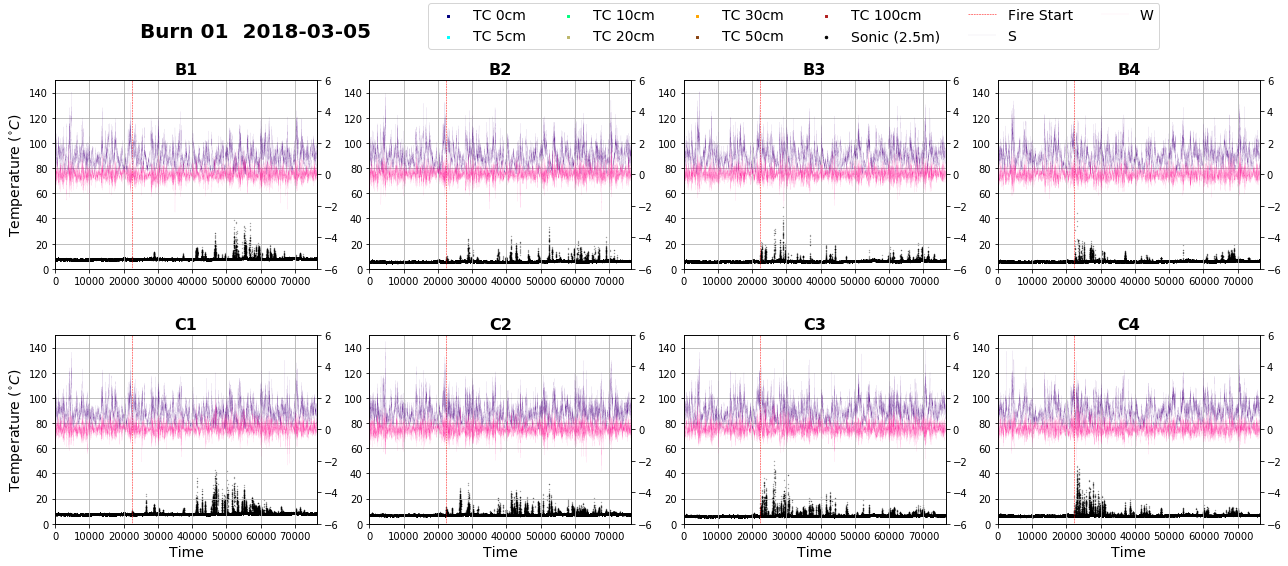

In [165]:
plotting_S_W("01", burn_d["01"][1], True)